## object_detection
- **localization + classification**

#### localization
- 물체가 이미지 내 어디 위치했는가의 문제 -> 좌표값 찾기
- **Regression 문제**

#### classification
- 영역 안의 물체가 무엇인가

<br>

### Segmentation
- 물체의 영역을 일일이 분리

#### Instance Segmentation
- 각 하나마다 개체를 분리
- Semantic Segmentation : 개가 여러 개면 하나로 합쳐서 표현

**Detection은 아직까지 사람보다 못하다** -> 성능은 높을 수 있으나 속도면에서 차이남
- 물체를 찾는 연구가 계속되고 있음. -> localization과 classification을 어떻게 동시에 할지
---

#### problem
- sliding을 해서 전체 영역을 훑는다. -> cnn에서도 문제였음.(invariant)
- 비율 문제(정사각형, 직사각형)

### Region Proposals
- 있을 만한 영역 탐지
- cnn방식 -> 정확도가 안 나올 때도 있어서 전통적인 방법을 쓰기도 함.

### Selective Search
- 비슷한 질감,색깔이 연결되어 크게 만드는 기법

In [2]:
!pip install selective-search

In [3]:
import skimage.io
from selective_search import selective_search

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [17]:
image = skimage.io.imread('everland2.jpg')
boxes = selective_search(image, mode='single', random_sort=False)

In [18]:
len(boxes)

1829

In [19]:
from PIL import ImageDraw, Image
im = Image.open('everland2.jpg')
idraw = ImageDraw.Draw(im)

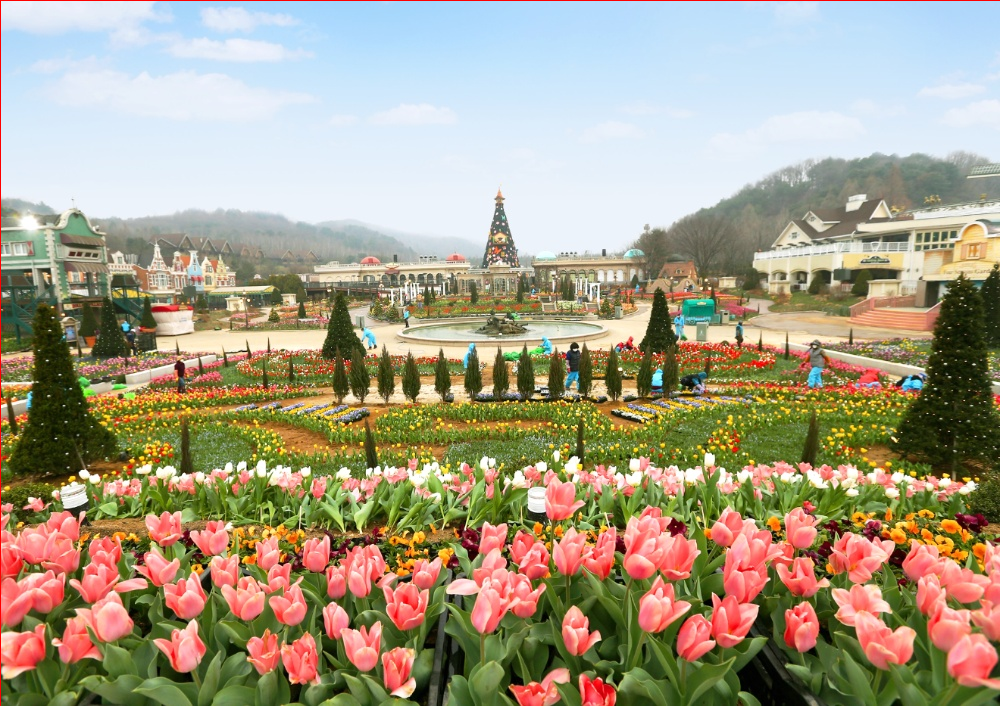

In [21]:
idraw.rectangle(boxes[0], outline='red')
im

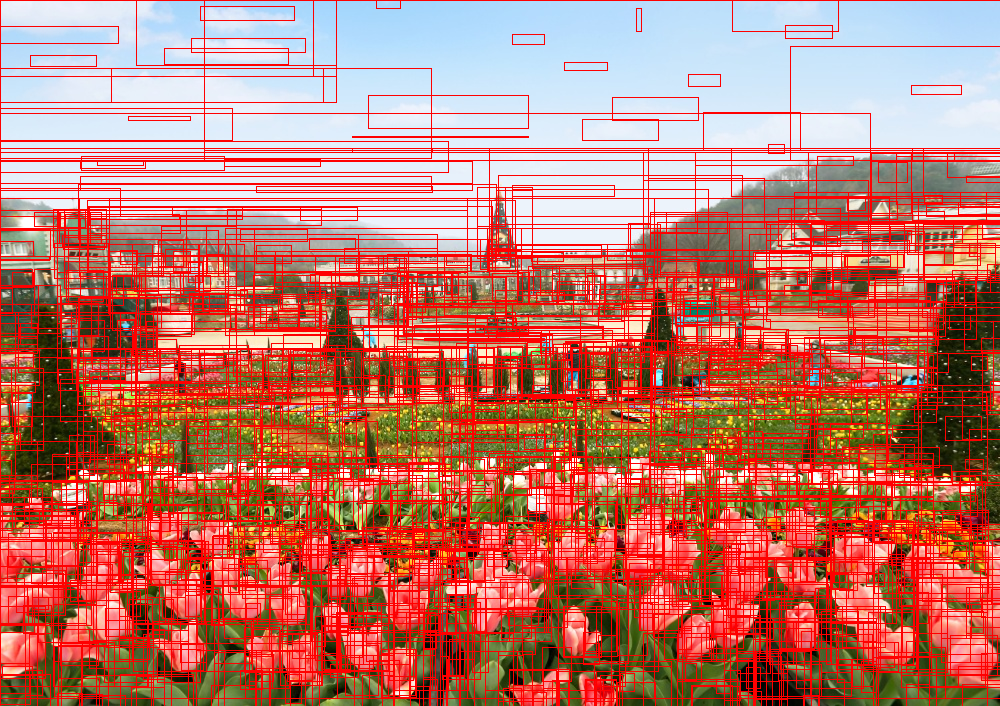

In [22]:
im = Image.open('everland2.jpg')
idraw = ImageDraw.Draw(im)
for i in boxes:
    idraw.rectangle(i, outline='red')
im

https://github.com/ChenjieXu/selective_search/blob/master/selective_search/core.py

- color, size, texture, fill (CTSF) 4가지 유사도 파악 -> window 찾기
- felzenszwalb : segmentation 기법
- single, fast, quality mode
- Starting region(k)

- **hierarchical Grouping**
    - 유사도 높은 것 찾아서 merge -> 반복

In [23]:
image = skimage.io.imread('everland2.jpg')
boxes = selective_search(image, mode='fast', random_sort=False)
len(boxes)
# 정확도가 떨어져서 많이 나옴

9610

cnn based
    - two-stage -> 정확성이 높음.
    - single approach -> 속도가 빠름
    
---

### image는 어떻게 학습..?
- 단순히는 regression + classification한 것
- 2013부터 cnn을 적용하려 했음

## R-CNN
Region with CNN
- 2000개 제한 
- wrap (resize)
- convolution해서 svm에 넣음
- Alexnet(feature extracion), B-box regressor, selective search
- CNN은 **positional invariance**
    - localization에서는 성능 안좋음.
- Bounding box 예측을 위해 Regression

</br>

#### Problem
- 여러 모델 쓰고 속도가 매우 느림
    - svm : vectorlization 안됨 -> GPU X

---

## SPPnet
- 2015에 resnet 만든 분이 만듬
- 크기를 맞추기 위해서 crop/wrap 이미지 왜곡해서 **Spatial pyramid pooling(SPP)**
- 공간적인 부분을 피라미드 형태로 구성 -> **spatial pyramid pooling**
- 이거도 끝이 svm


#### spatial pyramid pooling
- 이미지를 쪼개고 개수로 봄
- 1, 4, 9.. 등분해서 피라미트처럼 만듬.
- 크기와 상관없이 특징을 잡을 수 있음.

<br>

### BOW(bag-of-word)
- 특정 개체 분류시 큰 특징대신 작은 여러개의 특징을 사용하면 개체를 잘 구별
1. BoW 영상 전체를 커버할 수 있도록 1x1 pooling
2. SPP 영상을 4개의 영역으로 구분한 2x2 pooling,
3. SPP 영상을 9개의 영역으로 구분한 3x3 pooling....
  - 영상을 spatial bin이라고 불리는 총 M개의 영역으로 나눈 후 얻어진 여러 단계의 결과는 각각을 concatenation 시킨 후 flatten 입력으로 사용


**CNN은 크기 중요하지만 convolution 자체는 크기 상관없다**

---

#### pascal voc
- class이름, 좌표 값
- pandas dataframe, json파일 

1. Annotation
   - json ,csv ,xml 파일:
      - Image info : width, height, depth, name, pose 
      - 좌표값 4개 xmin,ymin,xmax,ymax  
2. ImageSet
3. JPEGImages

#### coco dataset

<br>

R-CNN
- selective search 안하고 바로 conv
- 나온 feature map(ROI)


---

## Convolution과 SVM 붙이기

In [25]:
import tensorflow as tf

In [26]:
vgg = tf.keras.applications.VGG16(include_top=False)

58892288/58889256 [==============================] - 6s 0us/step


In [27]:
model = tf.keras.models.Sequential([
    tf.keras.Input((224,224,3)),
    vgg,
    tf.keras.layers.GlobalAvgPool2D()
])
model.summary()
# 1차원이 됨

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [28]:
from sklearn.svm import SVC
svm = SVC()

In [55]:
im = skimage.io.imread('everland.jpg')
svm.fit(model.predict(im))

# convolution 지나간 값을 사용

In [30]:
import numpy as np
np.array((1,3,3,3))

array([1, 3, 3, 3])

## SPPnet 구현

- **만들어 놓은거 상속**
    - tf.keras.layers.Layer를 상속받아 만든다

https://www.tensorflow.org/tutorials/customization/custom_layers

- 학습이 필요없으면 lambda로 해결되지만 필요하면 layer를 만들어야 함.

- __ init __ 에서 층에 필요한 매개변수를 입력 받습니다.
- build, 입력 텐서의 크기를 얻고 남은 초기화를 진행할 수 있습니다
    - call이 있어서 사실상 안해도 되는 부분
- call, 정방향 연산(forward computation)을 진행 할 수 있습니다.
    - call은 내부적으로 __ call __ 호출 ()
    - 실행된적 없으면 bulid랑 call 둘 다
    - 함수형 paradigm layer값 받아서 전달

In [64]:
class SPPLayer(tf.keras.layers.Layer):
    def __init__(self, *arg, **kwargs): # 초기화
        super().__init__(*arg, **kwargs)
        
    def build(self,x): # overloading, call에서 중요
        print('build')
    def call(self,x):
        print('y')

In [65]:
spp = SPPLayer()

In [66]:
spp(3)

build
y


In [67]:
spp(4)

y


In [40]:
from tensorflow.keras import backend as K
# keras에서 편하게 쓸 수 있는 function, class
# keras와 tensorflow에서 제공이 다르기 때문
# keras는 numpy기반 tensorflow는 tensor기반

In [39]:
K.maximum is tf.maximum

False

In [41]:
np.maximum([1,2,3],[4,1,6])

array([4, 2, 6])

In [42]:
tf.reduce_max([3,2,3,1,6])

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [45]:
K.int_shape(np.array([[1,2,3]]))
# shape의 크기를 int로 해줌

(1, 3)

 각각의 영역에서 max

flatten

stride : 등간격, 
     - max값을 빨리 구할 수도 있음

In [68]:
a = np.arange(24)
a.strides

(4,)

In [69]:
a = a.reshape(4,6)
a.strides

(24, 4)

In [ ]:
class SPPLayer(tf.keras.layers.Layer):
    def __init__(self,filters, *arg, **kwags): # 초기화
        self.filters = filters
        super().__init__(*arg, **kwags)
        
    def call(self,x):
        outputs = []
        for f in self.filters:
            h,w=K.int_shape
        return K.concatenate(output)
    # call부분만 맞추면 어떤 layer든 만들 수 있음.
    
# 없는 함수는 numpy나 tensor 함수 이용할 수 있다.